In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



df= pd.read_csv("Auto.csv")

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


1    200
0    197
Name: mpg01, dtype: int64


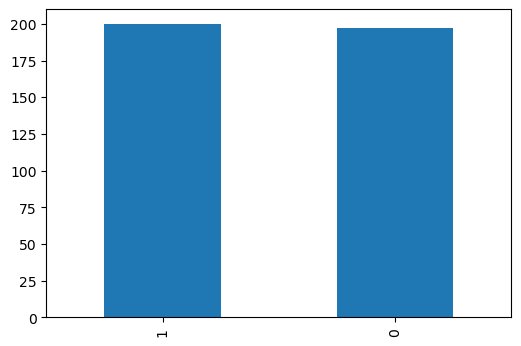

In [25]:
df["mpg01"] = (df["mpg"] >= df["mpg"].median()).astype(int)

print(df["mpg01"].value_counts())

plt.figure(figsize=(6, 4))
df["mpg01"].value_counts().plot(kind="bar")
plt.show()

Q: Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

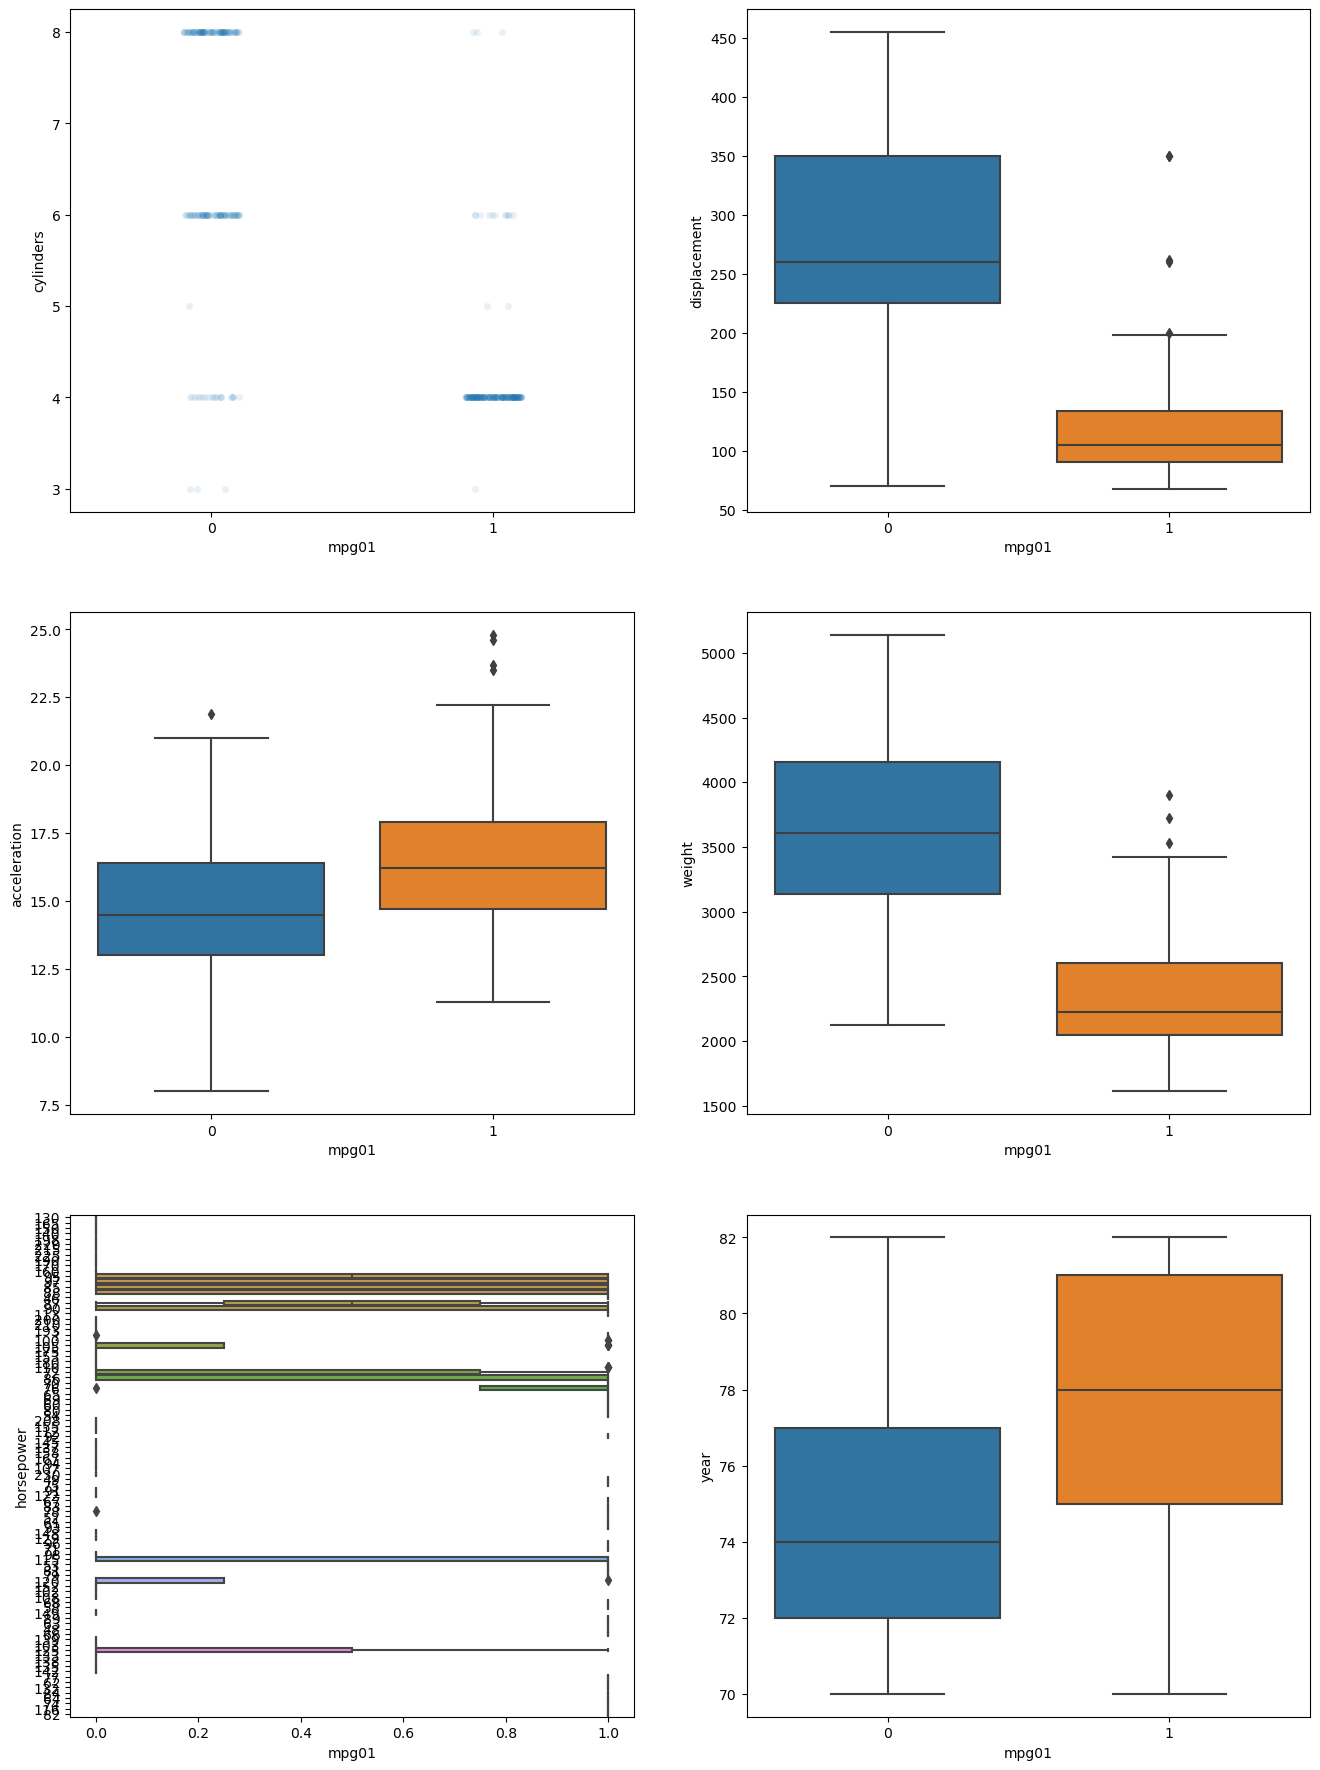

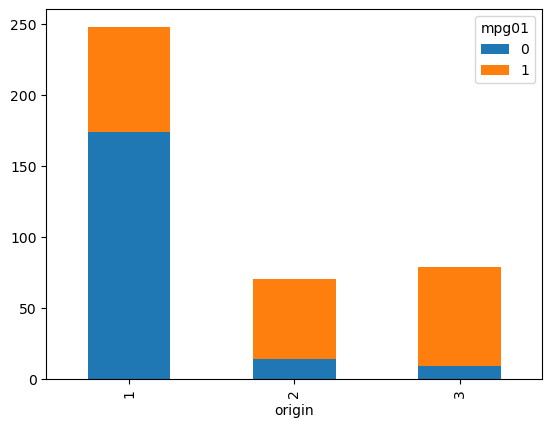

In [13]:
plt.figure(figsize=(16,30))

plt.subplot(4, 2, 1)
sns.stripplot (x='mpg01', y='cylinders', data = df, alpha=0.1)

plt.subplot(4, 2, 2)
sns.boxplot(x='mpg01', y="displacement", data=df)

plt.subplot(4, 2, 3)
sns.boxplot(x='mpg01', y="acceleration", data=df)

plt.subplot(4, 2, 4)
sns.boxplot(x='mpg01', y="weight", data=df)

#idk why it looks like that
plt.subplot(4, 2, 5)
sns.boxplot(x='mpg01', y="horsepower", data=df)

plt.subplot(4, 2, 6)
sns.boxplot(x='mpg01', y="year", data=df)

cross_tab = pd.crosstab(index=df['origin'], columns=df['mpg01'])
cross_tab.plot(kind='bar', stacked=True)

plt.show()

A: It’s tricky to compare predictive power between different graphs, but if I had to guess I would say that cylinders, displacement & weight are the three strongest predictors of mpg01.

It is harder to judge how strong a predictor origin is visually when compared with the other variables, since we are looking at a relationship between two nominal categorical variables, but it certainly appears to be on the weaker side.

Q: Split the data into a training set and a test set.

In [27]:
X = df.drop(columns=['mpg01'])
y = df['mpg01']

np.random.seed(444)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=444)

print(len(X_train) / len(df))

0.4987405541561713
